# Change Over Time, Black Lives Matter

In [190]:
import numpy as np

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

nltk.download('stopwords')

from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kiangolestaneh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
consumer_key= 'OqN95100ediMdZaZIAzbIziXU'
consumer_secret= 'eIV4qxuLYhY1w7G0wEWzL9pAVKvUESH1WKqdo9pQqCzNAvGdeF'
access_token= '3314061705-8ditQ1UvHK02vlEX1E7KvZ050Il1ZeXIcRtDRbV'
access_token_secret= 'ntrKgE1U14238E4zEnkdC1fZtzNFe92gmyVmk5HSBUvBj'

In [89]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

### How has the frequency of key words of the BLM movement changed on Twitter since the death of George Floyd

George Floyd passed away on May 25, 2020 from a reoccuring subject within the United States: Police brutality. The purpose of this notebook is to see the impact of his death in terms of how it sparked awareness on the platform if Twitter.

In [205]:
# Define the search term and the date_since date as variables
search_words = "black"
date_at_time_of_death = "2020-05-25"
date_prior = "2020-04-25"
date_after = "2020-06-12"

In [206]:
#Removes all retweets of the same tweet to avoid duplicates
new_search = search_words + " -filter:retweets"
new_search

'black -filter:retweets'

In [92]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [93]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['yours',
 'there',
 'for',
 "it's",
 'your',
 "that'll",
 'having',
 'couldn',
 "haven't",
 'yourselves']

# Sentiment on May 25, 2020

In [166]:
# Collect tweets for date_at_time_of_death
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_at_time_of_death,).items(100)
all_tweets_date_at_time_of_death = [tweet.text for tweet in tweets]
all_tweets_no_urls_date_at_time_of_death = [remove_url(tweet) for tweet in all_tweets_date_at_time_of_death]

# Remove capitalization impacts on unique returned values
words_list = all_tweets_no_urls_date_at_time_of_death
lower_case_all_tweets_no_urls_date_at_time_of_death = [word.lower() for word in words_list]
set(lower_case_all_tweets_no_urls_date_at_time_of_death)

{'am i the only one wondering how come i havent seen a black player on this team thoi think there might have been a',
 'amberraquei maam thats all you do on here i mind my business and laugh by myself lol',
 'black men are 6 of the us population but 40 of the us prison population slavery is banished except as a punish',
 'blackjesusftw im digging this vibe except we would be drinking a nice cold beer afterwards',
 'darrenplymouth erblack looters matter',
 'ersk santiagomayer zillablue i just have no idea why a young black man who represents the city in which breon',
 'first blackface was okay then it was bad now its politically correct to be in blackface againcolor me confu',
 'lets make a sandwich to start a happy day open the fridge and grab two pieces of croissants take chicken',
 'lets not pretend that shade rooms main audience isnt black women lie again',
 'mercon and the tenacious why dont they protest blackonblack crime like this',
 'munch said funky black culture',
 'nah yall m

In [159]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet_date_at_time_of_death = [tweet.lower().split() for tweet in all_tweets_no_urls_date_at_time_of_death]
words_in_tweet_date_at_time_of_death[:2]

# List of all words across tweets
all_words_no_urls_date_at_time_of_death = list(itertools.chain(*words_in_tweet_date_at_time_of_death))

# Create counter
counts_no_urls_date_at_time_of_death = collections.Counter(all_words_no_urls_date_at_time_of_death)

counts_no_urls_date_at_time_of_death.most_common(15)

[('black', 446),
 ('rt', 428),
 ('the', 316),
 ('a', 280),
 ('to', 193),
 ('in', 175),
 ('of', 136),
 ('is', 135),
 ('and', 127),
 ('was', 94),
 ('this', 90),
 ('for', 83),
 ('from', 82),
 ('lives', 81),
 ('that', 73)]

In [160]:
clean_tweets_no_urls_date_at_time_of_death = pd.DataFrame(counts_no_urls_date_at_time_of_death.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls_date_at_time_of_death.head()

,words,count
0,black,446
1,rt,428
2,the,316
3,a,280
4,to,193


In [161]:
tweets_nsw_date_at_time_of_death = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet_date_at_time_of_death]

In [162]:
all_words_nsw_date_at_time_of_death = list(itertools.chain(*tweets_nsw_date_at_time_of_death))

counts_nsw_date_at_time_of_death = collections.Counter(all_words_nsw_date_at_time_of_death)

counts_nsw_date_at_time_of_death.most_common(15)

[('black', 446),
 ('rt', 428),
 ('lives', 81),
 ('man', 70),
 ('people', 62),
 ('matter', 59),
 ('found', 41),
 ('white', 41),
 ('hanging', 39),
 ('women', 35),
 ('amp', 35),
 ('trans', 32),
 ('tree', 27),
 ('dont', 26),
 ('palmdale', 26)]

In [163]:
collection_words = ['black', 'rt', 'man']
tweets_nsw_nc_date_at_time_of_death = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw_date_at_time_of_death]

all_words_nsw_nc_date_at_time_of_death = list(itertools.chain(*tweets_nsw_nc_date_at_time_of_death))

# Create counter of words in clean tweets
counts_nsw_nc_date_at_time_of_death = collections.Counter(all_words_nsw_nc_date_at_time_of_death)

In [164]:
clean_tweets_ncw_date_at_time_of_death = pd.DataFrame(counts_nsw_nc_date_at_time_of_death.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw_date_at_time_of_death.head()

,words,count
0,lives,81
1,people,62
2,matter,59
3,found,41
4,white,41


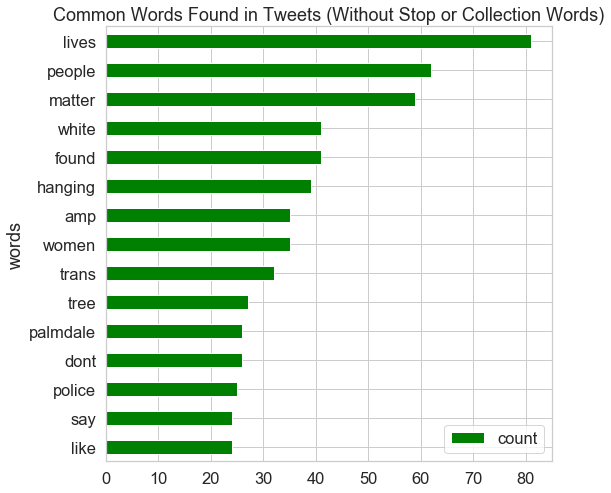

In [165]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw_date_at_time_of_death.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

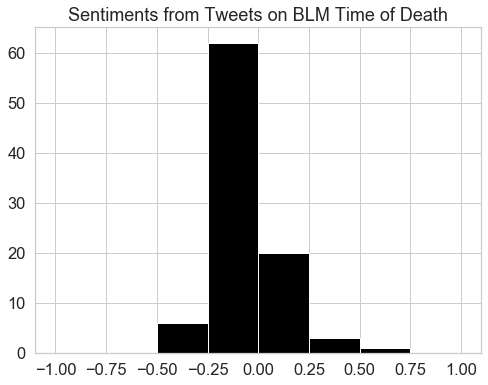

In [202]:
# Create textblob objects of the tweets
sentiment_objects_date_at_time_of_death = [TextBlob(tweet) for tweet in all_tweets_no_urls_date_at_time_of_death]

sentiment_objects_date_at_time_of_death[0].polarity, sentiment_objects_date_at_time_of_death[0]

sentiment_values_date_at_time_of_death = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects_date_at_time_of_death]

sentiment_values_date_at_time_of_death[0]

sentiment_df_date_at_time_of_death = pd.DataFrame(sentiment_values_date_at_time_of_death, columns=["polarity", "tweet"])

sentiment_df_date_at_time_of_death.head()

# Remove polarity values equal to zero
sentiment_df_date_at_time_of_death = sentiment_df_date_at_time_of_death[sentiment_df_date_at_time_of_death.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df_date_at_time_of_death.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="black")

plt.title("Sentiments from Tweets on BLM Time of Death")
plt.show()


# Sentiment on April 25, 2020

In [115]:
# Collect tweets for date_prior
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_prior).items(100)
all_tweets_date_prior = [tweet.text for tweet in tweets]
all_tweets_no_urls_date_prior = [remove_url(tweet) for tweet in all_tweets_date_prior]

# Remove capitalization impacts on unique returned values
words_list = all_tweets_no_urls_date_prior
lower_case_all_tweets_no_urls_date_prior = [word.lower() for word in words_list]
set(lower_case_all_tweets_no_urls_date_prior)

{'black lives matter',
 'blacklivesmatter is not a trend and its frustrating to see that most people have posted their black squares and a',
 'doing what i thought that should be done doesnt feel like enough now i need to do more than sharing equality and',
 'fav albums in black reply for a color',
 'has anyone noticed that instagram has become i have a black friend for white people businessescompanies and mu',
 'huncho jack travis scott quavo black amp chinese audioh264aac360p',
 'if you me and you not black you racist',
 'lolknbrhosts joshmcd131 lockupmell wojespn nightmare lmao tell that to the black people getting killed unjustl',
 'manuel17281370 wait till they start banning movies which include the first black woman to win an oscar in the mov',
 'philanthropy we can help quell this by reimagining how our own capital and power can be redistributed to support',
 'rt alamanecer if youre a company or brand who wants black creatives to take over your social media but dont want to make

In [116]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet_date_prior = [tweet.lower().split() for tweet in all_tweets_no_urls_date_prior]
words_in_tweet_date_prior[:2]

# List of all words across tweets
all_words_no_urls_date_prior = list(itertools.chain(*words_in_tweet_date_prior))

# Create counter
counts_no_urls_date_prior = collections.Counter(all_words_no_urls_date_prior)

counts_no_urls_date_prior.most_common(15)

[('black', 90),
 ('rt', 89),
 ('the', 63),
 ('a', 53),
 ('in', 47),
 ('and', 46),
 ('to', 46),
 ('of', 24),
 ('for', 22),
 ('is', 20),
 ('was', 20),
 ('that', 19),
 ('man', 17),
 ('on', 16),
 ('i', 16)]

In [117]:
clean_tweets_no_urls_date_prior = pd.DataFrame(counts_no_urls_date_prior.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls_date_prior.head()

,words,count
0,black,90
1,rt,89
2,the,63
3,a,53
4,in,47


In [118]:
tweets_nsw_date_prior = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet_date_prior]

In [119]:
all_words_nsw_date_prior = list(itertools.chain(*tweets_nsw_date_prior))

counts_nsw_date_prior = collections.Counter(all_words_nsw_date_prior)

counts_nsw_date_prior.most_common(15)

[('black', 90),
 ('rt', 89),
 ('man', 17),
 ('lives', 14),
 ('matter', 12),
 ('people', 11),
 ('found', 10),
 ('white', 9),
 ('trans', 8),
 ('women', 8),
 ('hanging', 8),
 ('amp', 8),
 ('us', 7),
 ('california', 7),
 ('support', 6)]

In [150]:
collection_words = ['black', 'rt', 'man']
tweets_nsw_nc_date_prior = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw_date_prior]

all_words_nsw_nc_date_prior = list(itertools.chain(*tweets_nsw_nc_date_prior))

# Create counter of words in clean tweets
counts_nsw_nc_date_prior = collections.Counter(all_words_nsw_nc_date_prior)

In [151]:
clean_tweets_ncw_date_prior = pd.DataFrame(counts_nsw_nc_date_prior.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw_date_prior.head()

,words,count
0,lives,14
1,matter,12
2,people,11
3,found,10
4,white,9


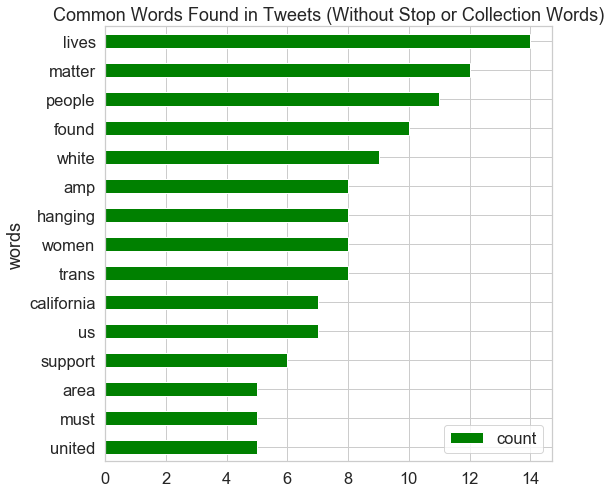

In [152]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw_date_prior.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

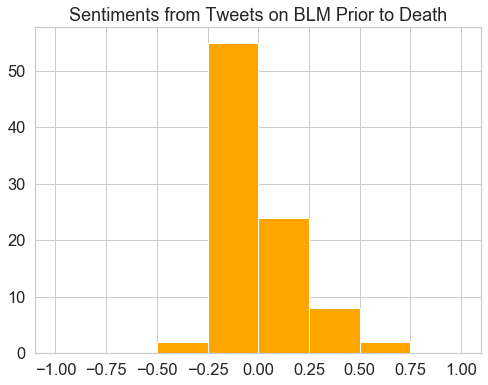

In [203]:
# Create textblob objects of the tweets
sentiment_objects_date_prior = [TextBlob(tweet) for tweet in all_tweets_no_urls_date_prior]

sentiment_objects_date_prior[0].polarity, sentiment_objects_date_prior[0]

sentiment_values_date_prior = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects_date_prior]

sentiment_values_date_prior[0]

sentiment_df_date_prior = pd.DataFrame(sentiment_values_date_prior, columns=["polarity", "tweet"])

sentiment_df_date_prior.head()

# Remove polarity values equal to zero
sentiment_df_date_prior = sentiment_df_date_prior[sentiment_df_date_prior.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df_date_prior.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="orange")

plt.title("Sentiments from Tweets on BLM Prior to Death")
plt.show()

# Sentiment on June 12, 2020

In [207]:
# Collect tweets for date_after
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_after).items(100)
all_tweets_date_after = [tweet.text for tweet in tweets]
all_tweets_no_urls_date_after = [remove_url(tweet) for tweet in all_tweets_date_after]

# Remove capitalization impacts on unique returned values
words_list = all_tweets_no_urls_date_after
lower_case_all_tweets_no_urls_date_after = [word.lower() for word in words_list]
set(lower_case_all_tweets_no_urls_date_after)

{'black man found hanged near city hall in california in alleged suicide but protesters suspect lynching amp demand',
 'canyonmoonftlwt everything is alright besides little black dress amp alive the disrespect',
 'davidgegs simplehumankant mypen002 vansully renoomokri imamofpeace lmao ur frustrated because u cant hijac',
 'fashion design black lives matter i cant breathe justice for george floyd anti racism tshirt',
 'furnessgirl id forgotten that all buildings were black then now im trying to think if they show that fact in f',
 'hlakam tiffanydcross davechappelle i didnt see defensive what i saw amp heard was anger amp righteous indignation',
 'hosie in black hosierainkiss',
 'i vow to stop if i see the cops with a black male pulled over i will watch i will listen i will be on alert i w',
 'its ok to say black i remember once somebody said hes not black hes african american and i said im not american im black though',
 'just cuz you have a black relative doesnt automatically mean tha

In [208]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet_date_after = [tweet.lower().split() for tweet in all_tweets_no_urls_date_after]
words_in_tweet_date_after[:2]

# List of all words across tweets
all_words_no_urls_date_after = list(itertools.chain(*words_in_tweet_date_after))

# Create counter
counts_no_urls_date_after = collections.Counter(all_words_no_urls_date_after)

counts_no_urls_date_after.most_common(15)

[('black', 88),
 ('rt', 82),
 ('a', 71),
 ('the', 62),
 ('in', 45),
 ('to', 38),
 ('of', 33),
 ('and', 30),
 ('i', 23),
 ('is', 23),
 ('man', 20),
 ('was', 17),
 ('for', 17),
 ('this', 15),
 ('people', 14)]

In [209]:
clean_tweets_no_urls_date_after = pd.DataFrame(counts_no_urls_date_after.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls_date_after.head()

,words,count
0,black,88
1,rt,82
2,a,71
3,the,62
4,in,45


In [210]:
tweets_nsw_date_after = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet_date_after]

In [211]:
all_words_nsw_date_after = list(itertools.chain(*tweets_nsw_date_after))

counts_nsw_date_after = collections.Counter(all_words_nsw_date_after)

counts_nsw_date_after.most_common(15)

[('black', 88),
 ('rt', 82),
 ('man', 20),
 ('people', 14),
 ('lives', 13),
 ('matter', 12),
 ('police', 12),
 ('found', 9),
 ('dont', 8),
 ('like', 8),
 ('white', 8),
 ('friend', 8),
 ('palmdale', 7),
 ('say', 7),
 ('atlanta', 7)]

In [212]:
collection_words = ['black', 'rt', 'man']
tweets_nsw_nc_date_after = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw_date_after]

all_words_nsw_nc_date_after = list(itertools.chain(*tweets_nsw_nc_date_after))

# Create counter of words in clean tweets
counts_nsw_nc_date_after = collections.Counter(all_words_nsw_nc_date_after)

In [213]:
clean_tweets_ncw_date_after = pd.DataFrame(counts_nsw_nc_date_after.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw_date_after.head()

,words,count
0,people,14
1,lives,13
2,matter,12
3,police,12
4,found,9


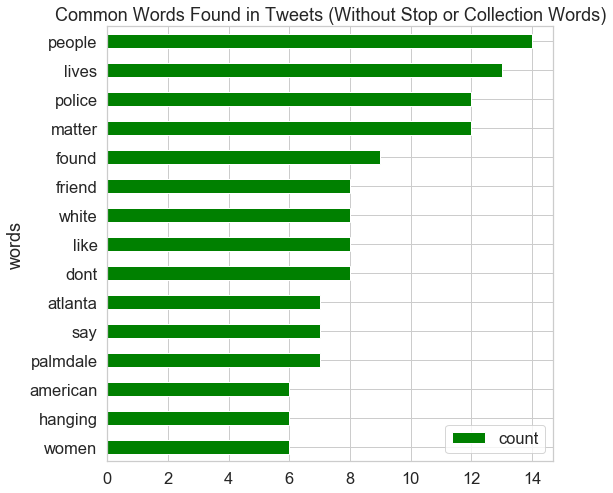

In [214]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw_date_after.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

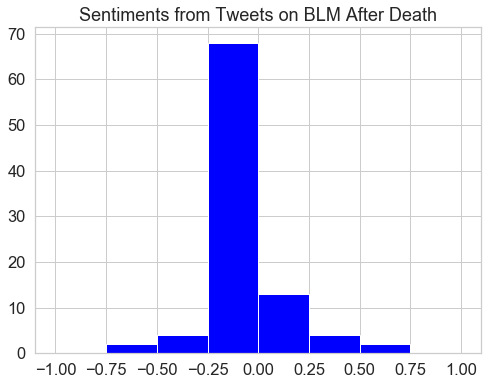

In [215]:
# Create textblob objects of the tweets
sentiment_objects_date_after = [TextBlob(tweet) for tweet in all_tweets_no_urls_date_after]

sentiment_objects_date_after[0].polarity, sentiment_objects_date_after[0]

sentiment_values_date_after = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects_date_after]

sentiment_values_date_after[0]

sentiment_df_date_after = pd.DataFrame(sentiment_values_date_after, columns=["polarity", "tweet"])

sentiment_df_date_after.head()

# Remove polarity values equal to zero
sentiment_df_date_after = sentiment_df_date_after[sentiment_df_date_after.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df_date_after.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on BLM After Death")
plt.show()